# 1. 인트로-모델 기반


### 잠재 요인 (LF)
- 사용자-아이템 상호작용 행렬에 숨겨져 있는 **숨겨진 차원**
- 사용자의 취향이나 아이템의 특성을 설명

### 행렬 분해 (MF)
- 가설: 사용자-아이템 평점 행렬이
    - 사용자의 취향 벡터와 아이템의 특성 벡터의 내적으로 설명될 수 있다
- 목표: 관측된 평점을 가장 잘 재현하는 **가장 적절한 잠재 요인의 개수**를 찾자~!

### MF 수행 방식

> ##### 특이값 분해 (SVD)
- 어떤 행렬($A$) 이든 세 행렬($U, Σ, V^T$)로 분해하는 방법
- $U$: 사용자 관련 정보
- $Σ$: 특잇값
    - 원래 패턴의 핵심 패턴을 효율적으로 압축
- $V^T$: 아이템 관련 정보

- Full SVD vs Truncated SVD
    - Full SVD (완전 특이값 분해)
        - 모든 특잇값과 벡터 사용
        - 밀집 행렬에 적합
    - Truncated SVD (절단 특이값 분해)
        - 상위 k개의 특잇값과 벡터 사용


> ##### SGD
- 관측 평점과 예측 평점 사이 오차 최소화하는 목적함수 사용
- SGD 사용한 MF 구현
    1. 초기화
        - 사용자 행렬($P$)와 아이템 행렬($Q^T$) 무작위 값
    2. 반복학습
    3. 오차계산
    4. 잠재 벡터 업데이트
        - 오차 줄이는 방향으로 $p_u, q_i$ 경사 하강법 이용해 업데이트

> ##### NMF
- 분해된 두개의 행렬($P, Q^T$)의 모든 요소가 0 이상이어야 한다는 제약조건 추가
- 대부분 현실 데이터에서는 음수가 아니기 때문

> ##### PMF
- 확률적 모델로 접근
- 베ㅇ지안 추론 기법과 결합 -> 정교한 추천 모델로 평가

# 2. 최근 추천 시스템의 방향성

## 2.1 VAE 기반 협업 필터링
- 사용자의 아이템 상호작용 벡터 입력으로 받아
- 잠재공간에서 재구성하도록 VAE 학습하는 방식
- 구조
    - 인코더: 사용자 이력을 잠재변수 z분포로 매핑
    - 디코더: z 바탕으로 아이템 분포 복원

> #### MF의 한계
- 선형성의 한계
    - 딥러닝: 비선형 활성화 함수 가진 신경망 통해 복잡한 패턴 학습 가능
- 불확실성 무시
    - 딥러닝: 확률 분포 사용하여 데이터 불확실성 반영

> #### 왜 AE가 아닌 VAE?
- AE: 단일 값 추정 -> 데이터가 부족하면 노이즈에 취약
- VAE: 분포 추정 -> 불확실성(데이터 부족으로 인한 오차범위)까지 모델링에 포함되어 희소 데이터에서도 안정적임

> #### VAE 기반 CF 작동 구조
- 입력: 사용자의 아이템 상호작용 벡터
- 인코더: 사용자 이력을 잠재변수 z 분포로 매핑
- 잠재 벡터: 샘플링된 최종 취향 벡터
- 디코더: z로부터 아이템 분포 복원

> #### 목적함수와 KL Divergence(잠재 공간 정규화)
- 목적함수의 목표
    1. 재구성 오차 최소화 (첫번째 항)
        - 목표: 잠재 벡터(z)를 활용해 최대한 입력 데이터와 비슷하게 복원하도록 한다
    2. KL Divergence (두번째 항)
        - 목표: 인코더가 출력하는 잠재 분포가 사전 분포와 유사하도록 한다
        - 역할: 잠재 공간을 불규칙하게 만드는 것 방지 & 정규 분포 근처로 압축하여 넓고 부드럽게 유지하도록 함 -> 보간 가능

> #### VAE-CF의 주요 장점
1. 확률적 잠재 분포 모델링 (불확실성 반영)
2. 희소한 상호작용 데이터에서도 강건
3. 비선형성 학습


## 2.2 GNN 기반 사용자 선호 예측

> #### GNN (그래프 신경망)
- 그래프
    - 노드(Node)와 노드를 잇는 선(Edge)을 모아 구성한 자료 구조
    - 엣지: 개체 간 관계 or 상호작용 (사용자 간 연결)
    - 노드: 현실 세계의 개체 (사용자)
    - 관계, 상호작용 같은 추상적인 개념 다루기 적합
    - 비유클리드 공간 표현 및 학습 가능

> #### GNN의 작동 구조
1. 그래프 구조 생성
    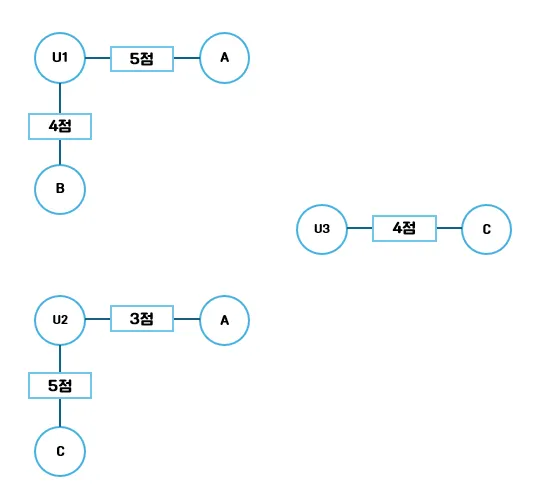
2. 메시지 패싱: 각 노드가 이웃 노드로부터 정보 전달 받아 전달
    2.1 메시지 생성: 이웃 노드에 전달할 메시지(임베딩) 생성
        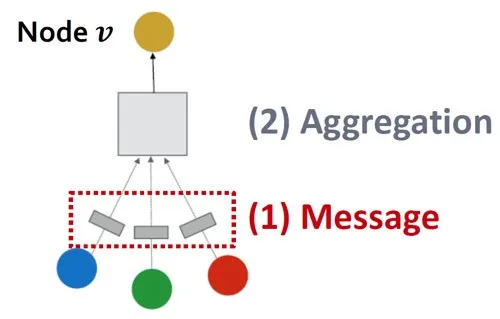
    2.2 집계: 이웃 노드들의 임베딩을 하나의 벡터로 통합
        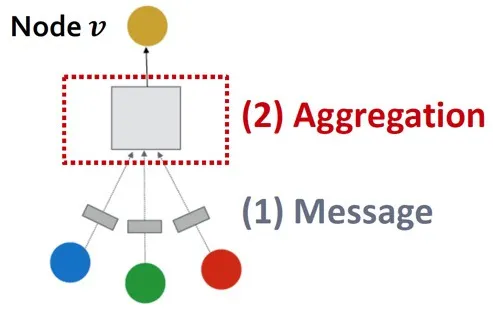
    2.3 갱신: 이웃 정보다 자신의 상태 결합해 -> 새로운 임베딩 계산 -> 자신의 노드 상태 업데이트
        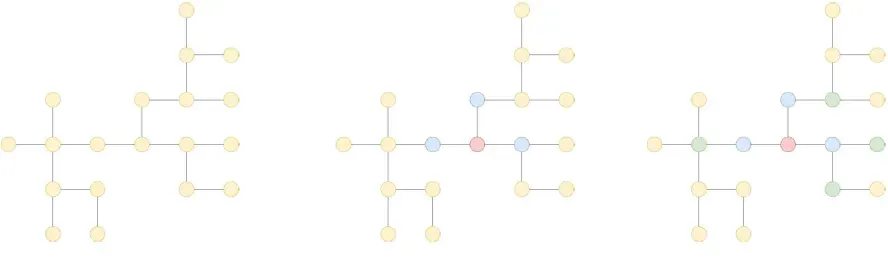
3. 최종 출력


> #### LightGCN
- 추천시스템에 특화된 GNN으로 복잡성 제거하고 최적화한 버전
- GNN의 구성요소인
    1. 특징 변환 제거
        - 레이어마다 복잡했던 학습 파라미터 삭제
    2. 비선형 활성화 함수 제거
        - 활성화 함수 사용 안 하고 이웃 정보 합친다
- 오직 정규화된 이웃 임베딩의 합으로만 구성

> #### GNN 활용 사례

- 소셜 네트워크
- 추천 시스템
- 화학 및 생명과학
- 금융 및 보안
- Traffic
- 프로그램 분석

> #### GNN 장단점
- 장점
    1. 고차원 협업 시그널 포착
    2. 정형화되지 않은 데이터 학습 가능
    3. Cold Start 문제 완화에 효과적

- 단점
    1. 과평탄화 문제
    2. 과압축 문제
    3. 계산 복잡도 향상
    4. 해석의 어려움


## 2.3 Transformer 기반 추천 시스템

> #### 기존 추천 시스템의 순차적 문제
- 시퀀스 내 문맥과 핵심 의도 파악을 위해 순서가 중요
- 아이템 역시 문맥에 따라 동일 아이템의 의미가 달라짐

> #### 사용자 행동 순서로 접근하기
- 사용자의 행동이 길어져도, 현재 의도와 가장 관련성 높은 핵심 문맥을 파악 가능

> #### Self-Attention
- 연산 과정
    1. Attention Score 계산
    2. 가중합 계산
    3. 가중 평균 내기


> #### Transformer 기반 추천 시스템 모델

##### SASRec
- 단방향 어텐션
- 현재 아이템은 과거의 아이템만 참조 가능
- 목표: 다음 아이템 예측
- 특징
    - 과거의 정보만 활용 -> 시간 흐름 반영
    - 다음 행동 예측에 집중되어있음
- 한계
    - 계산량이 많다
    - 단방향성

##### BERT4Rec
- 양방향 어텐션
- 시퀀스 일부를 MASK 토큰으로 가리고, 과거와 미래의 모든 아이템 참조 가능
- 목표: 시퀀스 내 가려진 아이템 예측
- 특징
    - 양방향 문맥 모두 고려
    - 시퀀스 전체 선호도 파악에 집중


> #### LLM의 시대
- 추천을 랭킹이 아닌 -> 언어 문제로 푼다
- 새로운 가능성
    - 대화형 추천: 자연어 요청 이해하고 추천
    - Zero-shot 추천: 학습 데이터에 없는 아이템도 추천 가능!
- P5: 모든 추천 과제를 하나의 거대한 텍스트 프롬프트 문제로 통일
- TALLRec: 범용 LLM을 효율적으로 튜닝하는 프레임워크

> #### 책임감 있는 AI
- 인기 평향
    - 소수의 인기 아이템에 노출이 과도하게 이뤄지는 현상
- 설명가능성(XAI)
    - 추천 이유에 대해 고객과 담당자를 설득시킬 수 있어야 함
- 선형 모델과 딥러닝 모델 공존 이유
    - 비용 문제!!!
    - 따라서 두 가지를 섞어서 활용한다
        1. 후보군 생성
            - 사용자가 조금이라도 좋아할만한 아이템을 선별해낸다
            - 생성 모델 사용
        2. 순위 매기기
            - 1단계에서 간추려진 후보군 대상으로
            - 사용자가 선호에 따라 정교하게 순위를 매김
            - 딥러닝 모델 사용
